# WIDER Datset

## Downloading and unzipping

In [8]:
!gdown https://drive.google.com/u/0/uc?id=15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M&export=download
!gdown https://drive.google.com/u/0/uc?id=1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q&export=download

Downloading...
From (original): https://drive.google.com/u/0/uc?id=15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M
From (redirected): https://drive.google.com/uc?id=15hGDLhsx8bLgLcIRD5DhYt5iBxnjNF1M&confirm=t&uuid=c8a12ab9-0b87-4e23-9d3e-6c005cd7f51f
To: /content/WIDER_train.zip
100% 1.47G/1.47G [00:20<00:00, 72.1MB/s]
Downloading...
From (original): https://drive.google.com/u/0/uc?id=1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q
From (redirected): https://drive.google.com/uc?id=1GUCogbp16PMGa39thoMMeWxp7Rp5oM8Q&confirm=t&uuid=5d67297d-254a-477a-aa4e-1cc74cfbefc1
To: /content/WIDER_val.zip
100% 363M/363M [00:07<00:00, 50.9MB/s]


In [2]:
!wget http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip

--2025-01-07 22:54:21--  http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip
Resolving mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)... 137.189.99.16
Connecting to mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)|137.189.99.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3591642 (3.4M) [application/zip]
Saving to: ‘wider_face_split.zip’

wider_face_split.zi 100%[===================>]   3.42M  2.51MB/s    in 1.4s    

2025-01-07 22:54:23 (2.51 MB/s) - ‘wider_face_split.zip’ saved [3591642/3591642]



In [6]:
!cp /content/drive/MyDrive/WIDER_Dataset/* /content/

cp: cannot stat '/content/drive/MyDrive/WIDER_Dataset/*': No such file or directory


In [9]:
!unzip -qx /content/WIDER_train.zip
!unzip -qx /content/WIDER_val.zip
!unzip -qx /content/wider_face_split.zip

replace wider_face_split/readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


## Creating the dataset

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob as g
import cv2
from tqdm.notebook import tqdm
from shutil import copy, move
from google.colab.files import download

In [11]:
# Val Dataset
new_imgs_dir = '/content/newDataset/images/val'
new_lbls_dir = '/content/newDataset/labels/val'
label_text_name = '/content/wider_face_split/wider_face_val_bbx_gt.txt'
imgs_address = '/content/WIDER_val/images'

os.makedirs(new_imgs_dir,exist_ok = True)
os.makedirs(new_lbls_dir,exist_ok = True)
annots = open(label_text_name)
lines = annots.readlines()
names =   [x for x in lines if 'jpg' in x]
indices = [lines.index(x) for x in names]


for n in tqdm(range(len(names[:]))):
    i = indices[n]
    name = lines[i].rstrip()
    old_img_path = os.path.join(imgs_address , name)
    name = name.split('/')[-1]
    label_path = os.path.join(new_lbls_dir , name.split('.')[0] + '.txt')
    img_path = os.path.join(new_imgs_dir , name)

    num_objs = int(lines[i+1].rstrip())
    bboxs = lines[i+2 : i+2+num_objs]
    bboxs = list(map(lambda x:x.rstrip() , bboxs))
    bboxs = list(map(lambda x:x.split()[:4], bboxs))
    # if len(bboxs) > 5:
    #     continue
    img = cv2.imread(old_img_path)
    img_h,img_w,_ = img.shape
    img_h,img_w,_ = img.shape
    f = open(label_path, 'w')
    count = 0 # Num of bounding box
    for bbx in bboxs:
        x1 = int(bbx[0])
        y1 = int(bbx[1])
        w = int(bbx[2])
        h = int(bbx[3])
    #     #yolo:
        x = (x1 + w//2) / img_w
        y = (y1 + h//2) / img_h
        w = w / img_w
        h = h / img_h
        if w * h * 100 > 2:
            yolo_line = f'{0} {x} {y} {w} {h}\n'
            f.write(yolo_line)
            count += 1
    f.close()
    if count > 0:
        copy(old_img_path , img_path)
    else:
        os.remove(label_path)

  0%|          | 0/3226 [00:00<?, ?it/s]

In [12]:
# Train Dataset
new_imgs_dir = '/content/newDataset/images/train'
new_lbls_dir = '/content/newDataset/labels/train'
label_text_name = '/content/wider_face_split/wider_face_train_bbx_gt.txt'
imgs_address = '/content/WIDER_train/images'

os.makedirs(new_imgs_dir,exist_ok = True)
os.makedirs(new_lbls_dir,exist_ok = True)
annots = open(label_text_name)
lines = annots.readlines()
names =   [x for x in lines if 'jpg' in x]
indices = [lines.index(x) for x in names]


for n in tqdm(range(len(names[:]))):
    i = indices[n]
    name = lines[i].rstrip()
    old_img_path = os.path.join(imgs_address , name)
    name = name.split('/')[-1]
    label_path = os.path.join(new_lbls_dir , name.split('.')[0] + '.txt')
    img_path = os.path.join(new_imgs_dir , name)
    num_objs = int(lines[i+1].rstrip())
    bboxs = lines[i+2 : i+2+num_objs]
    bboxs = list(map(lambda x:x.rstrip() , bboxs))
    bboxs = list(map(lambda x:x.split()[:4], bboxs))
    # if len(bboxs) > 5:
    #     continue
    img = cv2.imread(old_img_path)
    img_h, img_w, _ = img.shape
    f = open(label_path, 'w')
    count = 0 # Num of bounding box
    for bbx in bboxs:
        x1 = int(bbx[0])
        y1 = int(bbx[1])
        w = int(bbx[2])
        h = int(bbx[3])
    #     #yolo:
        x = (x1 + w//2) / img_w
        y = (y1 + h//2) / img_h
        w = w / img_w
        h = h / img_h
        if w * h * 100 > 2:
            yolo_line = f'{0} {x} {y} {w} {h}\n'
            f.write(yolo_line)
            count += 1
    f.close()
    if count > 0:
        copy(old_img_path , img_path)
    else:
        os.remove(label_path)

  0%|          | 0/12880 [00:00<?, ?it/s]

## Resizing and Showing

In [13]:
def resize_img(input_name , output_name, target_width = 416):
    im = cv2.imread(input_name)
    h,w,_  = im.shape
    target_height = int(h / w * target_width)
    im = cv2.resize(im , (target_width , target_height), interpolation = cv2.INTER_AREA)
    cv2.imwrite(output_name , im)

def resize_all_imgs(imgs_dir):
    names = g(os.path.join(imgs_dir , '*'))
    for img in tqdm(names):
        resize_img(img, img)

In [14]:
names = g('/content/newDataset/labels/*/*')
print(f'Threre are {len(names)}  images')

Threre are 5253  images


In [15]:
resize_all_imgs('/content/newDataset/images/*')

  0%|          | 0/5253 [00:00<?, ?it/s]

In [16]:
n = np.random.randint(0, len(names))
f = open(names[n])

lines = f.readlines()

In [17]:
lines

['0 0.48046875 0.31285988483685223 0.556640625 0.4037108125399872\n']

number of bounding boxes : 1
Shape on the image : (461, 416, 3)


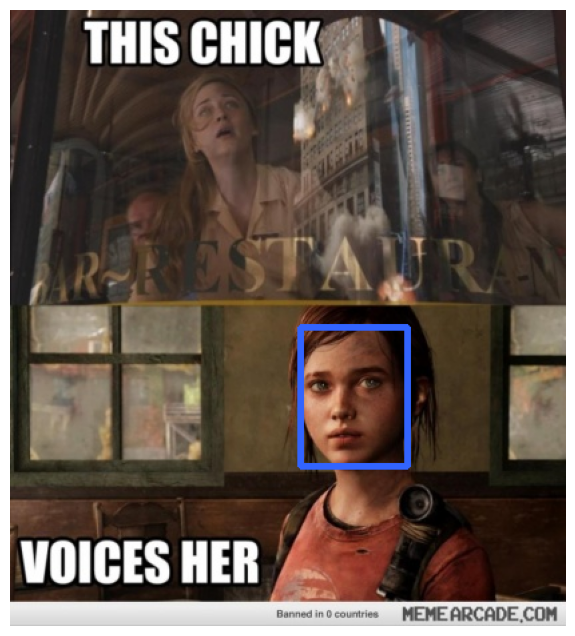

In [18]:
n = np.random.randint(0, len(names))
f = open(names[n])

lines = f.readlines()
classes = list(map(lambda x: int(x[0]), lines))
lines = list(map(lambda x:x.rstrip()[2:], lines))
objects = list(map(lambda x:(x.split()), lines))

img = cv2.imread(names[n].replace('txt','jpg').replace('labels', 'images'))
for c, bbox in zip(classes, objects):
  bbox = list(map(lambda x:float(x), bbox))
  x,y,w,h = bbox
  img_h = img.shape[0]
  img_w = img.shape[1]
  x = int(x * img_w)
  w = int(w * img_w)
  y = int(y * img_h)
  h = int(h * img_h)
  color = (255,100,50)
  cv2.rectangle(img , (int(x-w/2), int(y-h/2)), (int(x+w/2), int(y+h/2)), color , 4)
plt.figure(figsize = (8,8))
plt.imshow(img[:,:,::-1]); plt.axis('off')
print(f'number of bounding boxes : {len(classes)}')
print(f'Shape on the image : {img.shape}')

## Create Grid

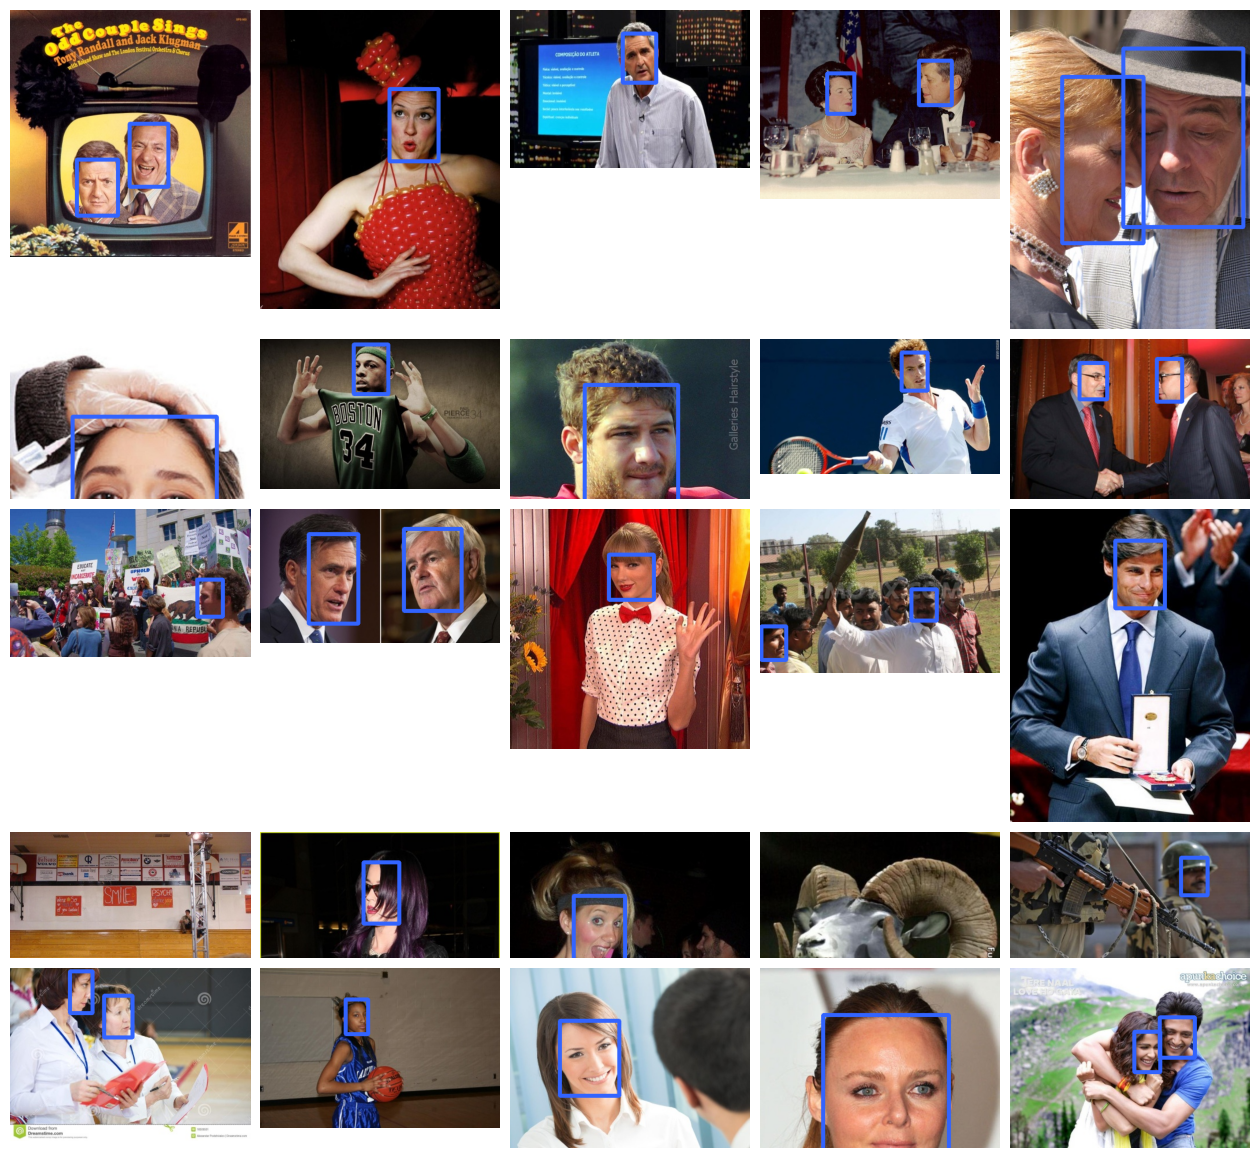

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

images = []
for _ in range(25):
    n = np.random.randint(0, len(names))
    f = open(names[n])

    lines = f.readlines()
    classes = list(map(lambda x: int(x[0]), lines))
    lines = list(map(lambda x:x.rstrip()[2:], lines))
    objects = list(map(lambda x:(x.split()), lines))

    img = cv2.imread(names[n].replace('txt','jpg').replace('labels', 'images'))
    for c, bbox in zip(classes, objects):
        bbox = list(map(lambda x:float(x), bbox))
        x,y,w,h = bbox
        img_h = img.shape[0]
        img_w = img.shape[1]
        x = int(x * img_w)
        w = int(w * img_w)
        y = int(y * img_h)
        h = int(h * img_h)
        color = (255,100,50)
        cv2.rectangle(img , (int(x-w/2), int(y-h/2)), (int(x+w/2), int(y+h/2)), color , 6)
    # plt.figure(figsize = (8,8))
    # plt.imshow(img[:,:,::-1]); plt.axis('off')
    # print(f'number of bounding boxes : {len(classes)}')
    images.append(img[:,:,::-1])
fig = plt.figure(figsize=(16., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5 ,5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, images):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.axis('off')

plt.show()

In [20]:
fig.savefig('grid_output.png')
download('grid_output.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train/Val >>>> ZIP

In [21]:
os.makedirs('/content/Yolo/images', exist_ok= True)
os.makedirs('/content/Yolo/labels', exist_ok= True)
os.makedirs('/content/Yolo/images/train', exist_ok= True)
os.makedirs('/content/Yolo/images/val', exist_ok= True)
os.makedirs('/content/Yolo/labels/train', exist_ok= True)
os.makedirs('/content/Yolo/labels/val', exist_ok= True)

In [22]:
labels_address = '/content/newDataset/labels/'
imgs_address = '/content/newDataset/images/'
np.random.seed(101)
names = os.listdir(imgs_address)
randvec = np.random.rand(len(names))
i = 0
for name in tqdm(names[:]):

  epsilon = randvec[i]
  i += 1
  epsilon = np.random.rand(1)
  if epsilon>0.85: #Validation
    copy(imgs_address + name , '/content/Yolo/images/val/' + name)
    copy(labels_address + name.split('.')[0] + '.txt' , '/content/Yolo/labels/val/' + name.split('.')[0] + '.txt')


  else: #Train
    copy(imgs_address + name,  '/content/Yolo/images/train/' + name)
    copy(labels_address + name.split('.')[0] + '.txt' , '/content/Yolo/labels/train/' + name.split('.')[0] + '.txt')



  0%|          | 0/2 [00:00<?, ?it/s]

IsADirectoryError: [Errno 21] Is a directory: '/content/newDataset/images/train'

In [23]:
labels_address = '/content/newDataset/labels/'
imgs_address = '/content/newDataset/images/'
np.random.seed(101)

# Get all image files from subdirectories (train and val)
all_image_files = []
for subdir in os.listdir(imgs_address):
    subdir_path = os.path.join(imgs_address, subdir)
    if os.path.isdir(subdir_path):
        all_image_files.extend([os.path.join(subdir, filename) for filename in os.listdir(subdir_path)])

randvec = np.random.rand(len(all_image_files))
i = 0
for name in tqdm(all_image_files[:]):

  epsilon = randvec[i]
  i += 1
  epsilon = np.random.rand(1)
  if epsilon>0.85: #Validation
    copy(os.path.join(imgs_address, name) , '/content/Yolo/images/val/' + name.split('/')[-1])
    copy(os.path.join(labels_address, name.split('/')[-1].split('.')[0] + '.txt') , '/content/Yolo/labels/val/' + name.split('/')[-1].split('.')[0] + '.txt')


  else: #Train
    copy(os.path.join(imgs_address, name),  '/content/Yolo/images/train/' + name.split('/')[-1])
    copy(os.path.join(labels_address, name.split('/')[-1].split('.')[0] + '.txt') , '/content/Yolo/labels/train/' + name.split('/')[-1].split('.')[0] + '.txt')

  0%|          | 0/5253 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: '/content/newDataset/labels/52_Photographers_photographertakingphoto_52_320.txt'

In [24]:
!zip -rq Yolo.zip /content/newDataset

In [25]:
download('Yolo.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Training Yolo

In [26]:
import torch
from IPython.display import clear_output
torch.cuda.get_device_name()

'Tesla T4'

In [29]:
!git clone https://github.com/sefaburakokcu/quantized-yolov5/
!pip install -qr /content/quantized-yolov5/requirements.txt
%cd quantized-yolov5


Cloning into 'quantized-yolov5'...
remote: Enumerating objects: 7065, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 7065 (delta 95), reused 137 (delta 75), pack-reused 6893 (from 1)
Receiving objects: 100% (7065/7065), 9.60 MiB | 14.54 MiB/s, done.
Resolving deltas: 100% (4814/4814), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.6/706.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 24.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
/content/quantized-yolov5


In [ ]:
f = open('/content/yolov5/data/dataset.yaml', 'w')
f.write('train: /content/newDataset/images/train')
f.write('\nval: /content/newDataset/images/val')
f.write('\nnc: {}'.format(1))
f.write("\nnames: ['Face']")

f.close()

# f = open('/content/yolov5/models/newyolov5s.yaml', 'w')
# f.write('nc: {}\n'.format(1))
# f.write('\n'.join(open('/content/yolov5/models/yolov5s.yaml').read().split('\n')[2:]))
# f.close()

In [32]:
!python train.py --img 416 --batch 64 --workers 8 --epochs 300\
  --weights yolov5s.pt\
  --cfg /content/yolov5/models/yolov5s.yaml\
  --data /content/yolov5/data/dataset.yaml\
  --weights yolov5s\

2025-01-08 00:34:41.225646: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-08 00:34:41.245441: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-08 00:34:41.251716: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-08 00:34:41.266988: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-08 00:34:42.498860: W tensorflow/comp

In [ ]:
!python train.py --data widerface.yaml --cfg models/hub/yolov1-tiny-quant.yaml --weights '' --batch-size 128 --epochs 50 --workers 8 --img 416

2025-01-08 02:21:35.168991: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-08 02:21:35.189300: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-08 02:21:35.195188: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-08 02:21:35.209349: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-08 02:21:36.305008: W tensorflow/comp

In [46]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17093, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 17093 (delta 23), reused 8 (delta 7), pack-reused 17057 (from 5)
Receiving objects: 100% (17093/17093), 15.70 MiB | 15.02 MiB/s, done.
Resolving deltas: 100% (11723/11723), done.


In [33]:
!python detect.py --weights runs/train/exp6/weights/best.pt --source data/images/zidane.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=data/images/zidane.jpg, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, widerface=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 87330a3 torch 2.5.1+cu121 CPU

/content/quantized-yolov5/models/experimental.py:96: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the 

In [52]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.5.1
    Uninstalling setuptools-69.5.1:
      Successfully uninstalled setuptools-69.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
brevitas 0.11.0 requires setuptools<70.0, but you have setuptools 75.7.0 which is incompatible.


In [61]:
!python train.py --data widerface.yaml --cfg models/hub/yolov3-tiny.yaml --weights '' --batch-size 128 --epochs 50 --img 416

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-01-08 01:10:59.817781: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-08 01:10:59.837418: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-08 01:10:59.845678: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visua

In [62]:
cd ../quantized-yolov5

/content/quantized-yolov5
